In [ ]:
!pip install pandas
!pip install xlrd
!pip install geopandas
!pip install matplotlib
!pip install folium

In [13]:
import pandas as pd
import geopandas
from geopandas import GeoDataFrame as gpd
import matplotlib.pyplot as plt

# 1. Carbon Flux to the Atmosphere from Land-Use Changes 1850-2005 Dataset

In [14]:
df_land_use = pd.read_excel("Global_land-use_flux-1850_2005.xls",sheet_name="net fluxes")
df_land_use.head()

,Year,Global,USA,Canada,S+C America,Europe,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,Pac.Dev.Reg
0,1850,500.6,164.0922,5.5476,23.4757,55.0441,3.9840,-1.3484,58.5571,101.8392,87.3469,2.0458
1,1851,492.7,165.7256,5.3626,23.1520,55.0156,3.9839,-1.1192,58.5525,93.0766,86.9100,2.0419
2,1852,548.5,230.6725,5.3380,22.8618,54.9874,3.9837,-1.0033,58.8781,83.8307,86.9385,2.0379
3,1853,546.8,238.5149,5.3138,22.6017,54.9590,3.9835,-1.0513,59.2207,74.2140,86.9935,2.0338
4,1854,544.8,246.1846,5.2899,22.3687,54.9304,3.9833,-0.9855,59.5802,64.3129,87.0630,2.0297


<AxesSubplot:xlabel='Year'>

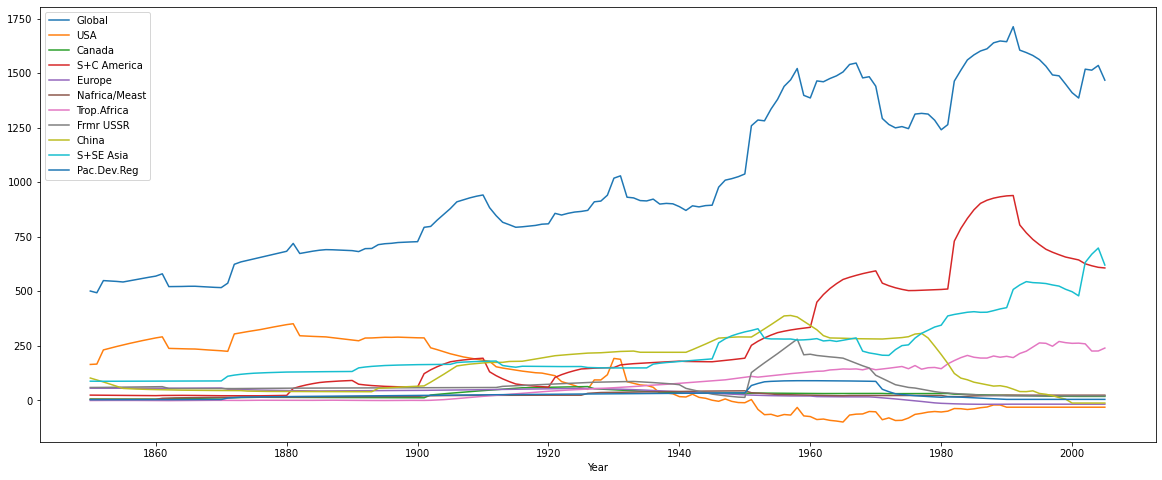

In [15]:
df_land_use.set_index('Year').plot(figsize=(20, 8))

<AxesSubplot:xlabel='Year'>

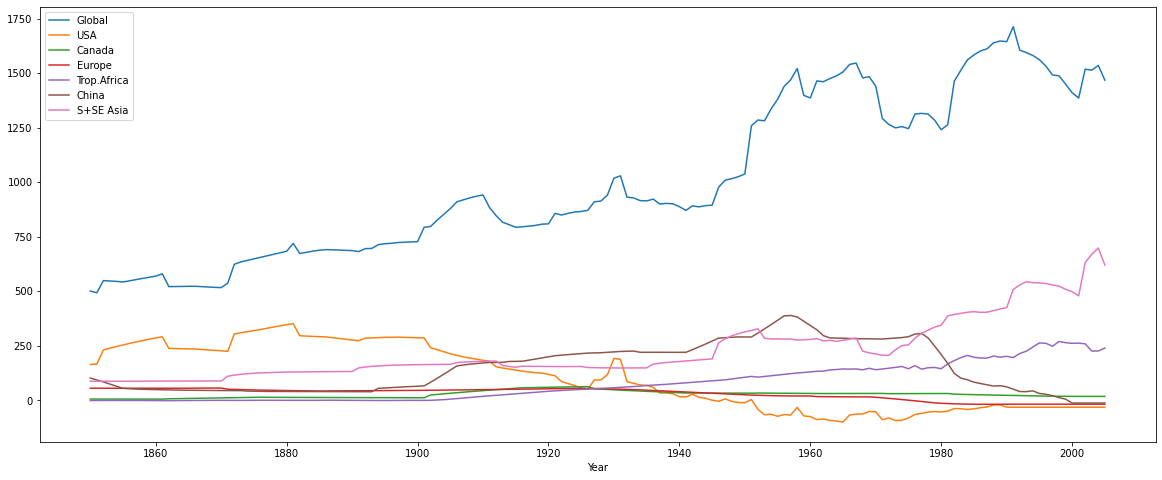

In [16]:
select_countries = ["Year", "Global", "USA", "Canada" ,"Europe","Trop.Africa", "China", "S+SE Asia"]
df_land_use = df_land_use[select_countries]
df_land_use.set_index('Year').plot(figsize=(20, 8))

# 2. Methane Dataset

In [17]:
methane = pd.read_excel("methane.xls",sheet_name="NASA TRIPS ADJUSTED")
methane.head()

,Unnamed: 0,Note: -999.000 implies a missing value; ppmv indicates parts per million per volume,Unnamed: 2,Latitude,Longitude,Methane
0,Can,Location,Mo-Day-Yr,(digital degrees),(digital degrees),CH4 (ppmv)
1,6213,"Barrow Weather Station (NOAA), Alaska",1983-03-25 00:00:00,71.3,-156.78,1.711
2,8159,"Barrow Weather Station (NOAA), Alaska",1983-03-25 00:00:00,71.3,-156.78,1.706
3,4188,"Barrow Weather Station (NOAA), Alaska",1983-03-26 00:00:00,71.3,-156.78,1.706
4,7194,"Barrow Weather Station (NOAA), Alaska",1983-03-26 00:00:00,71.3,-156.78,1.707


## Change the name of columns

In [18]:
methane.columns = ["Can", "Location", "datetime", "Latitude", "Longitude", "CH4"]
methane.head(2).T

,0,1
Can,Can,6213
Location,Location,"Barrow Weather Station (NOAA), Alaska"
datetime,Mo-Day-Yr,1983-03-25 00:00:00
Latitude,(digital degrees),71.3
Longitude,(digital degrees),-156.78
CH4,CH4 (ppmv),1.711


## Drop the first row since the data is irrelevant

In [19]:
methane = methane.iloc[1:,:]
methane.head(2).T

,1,2
Can,6213,8159
Location,"Barrow Weather Station (NOAA), Alaska","Barrow Weather Station (NOAA), Alaska"
datetime,1983-03-25 00:00:00,1983-03-25 00:00:00
Latitude,71.3,71.3
Longitude,-156.78,-156.78
CH4,1.711,1.706


## Plot the coordinates over a country-level map

In [20]:
g_methane = gpd(methane[['Latitude', 'Longitude', 'CH4']], geometry=geopandas.points_from_xy(methane.Longitude, methane.Latitude))
g_methane.head()

,Latitude,Longitude,CH4,geometry
1,71.3,-156.78,1.711,POINT (-156.78000 71.30000)
2,71.3,-156.78,1.706,POINT (-156.78000 71.30000)
3,71.3,-156.78,1.706,POINT (-156.78000 71.30000)
4,71.3,-156.78,1.707,POINT (-156.78000 71.30000)
5,71.3,-156.78,1.708,POINT (-156.78000 71.30000)


In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [22]:
# continents name
world.continent.value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

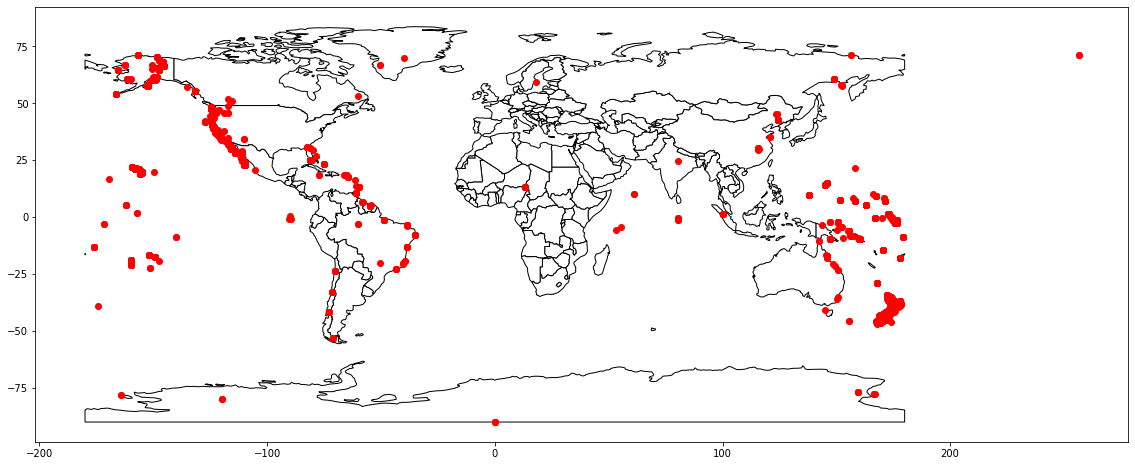

In [23]:
ax = world.plot(color='white', edgecolor='black',  figsize=(20, 8))
# We can now plot our ``GeoDataFrame``.
g_methane.plot(ax=ax, color='red')
plt.show()

In [27]:
# convert datetime into pandas datetime
methane.datetime  = pd.to_datetime(methane.datetime)
# create a year column
methane['year'] = methane.datetime.dt.year

<AxesSubplot:xlabel='year'>

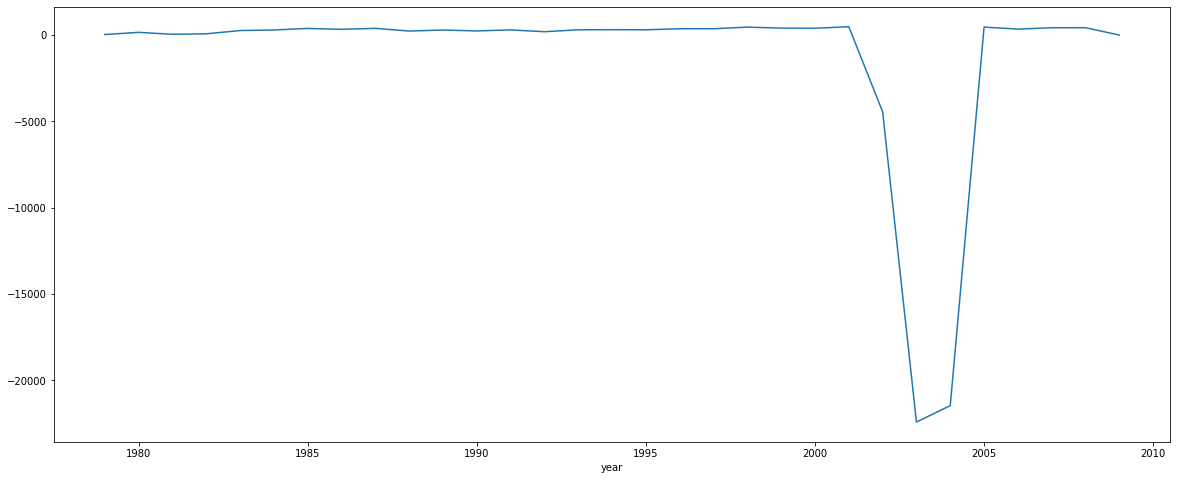

In [39]:
methane.groupby('year')['CH4'].sum().plot(figsize=(20,8))

## Negative Methane values ??

In [47]:
methane.groupby('year')['CH4'].sum()[methane.groupby('year')['CH4'].sum() < 0]

year
2002    -4437.802
2003   -22409.724
2004   -21457.837
Name: CH4, dtype: float64

## Drop the negative ones and replot the methane

<AxesSubplot:xlabel='year'>

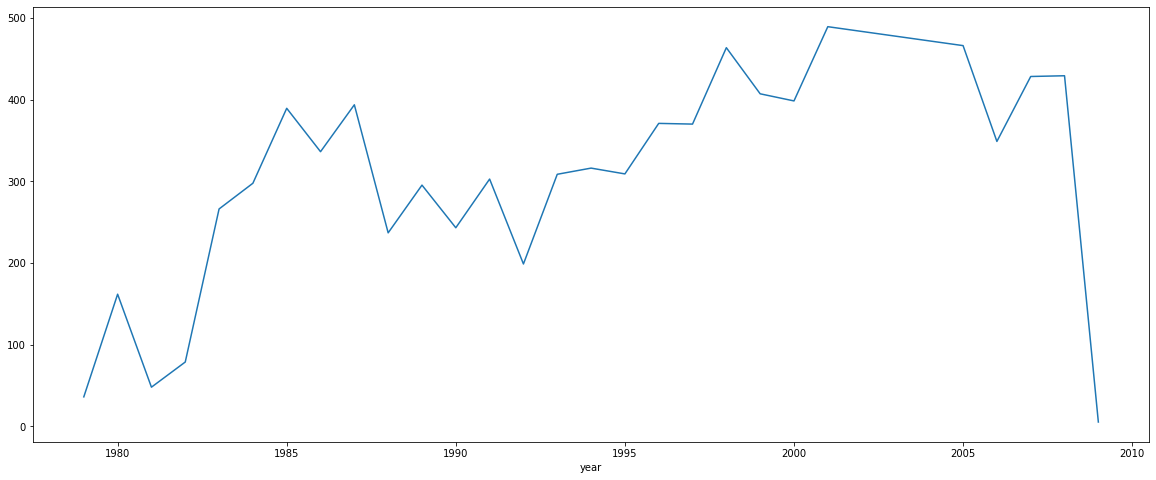

In [50]:
methane.groupby('year')['CH4'].sum()[methane.groupby('year')['CH4'].sum() > 0].plot(figsize=(20,8))
# methane was dropped significantly ???

# 3. Halogenated Organic Compounds (be continued)